In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df.shape

(1338, 7)

In [14]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [16]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### categorical features
-  smoker
-  sex
-  region

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


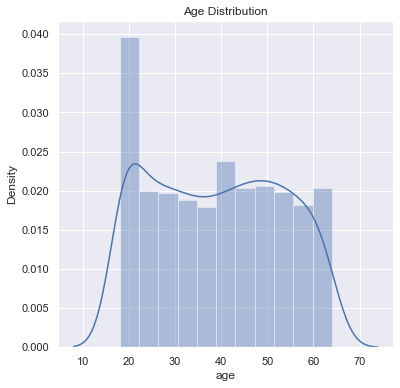

In [18]:
# distribution of age value

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

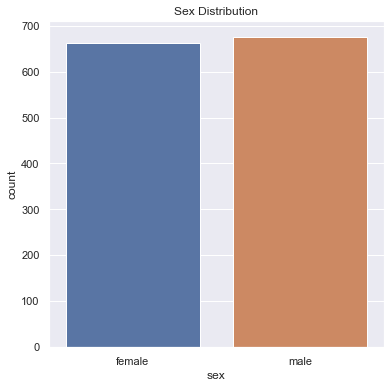

In [19]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [20]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

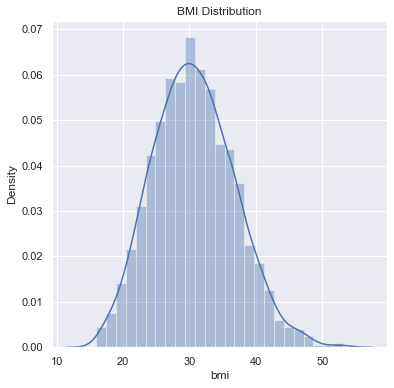

In [23]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

#### Normal BMI range---> 18.5 to 24.9

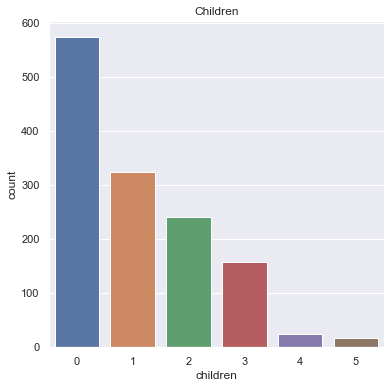

In [24]:
# childern colunm
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('Children')
plt.show()

In [25]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

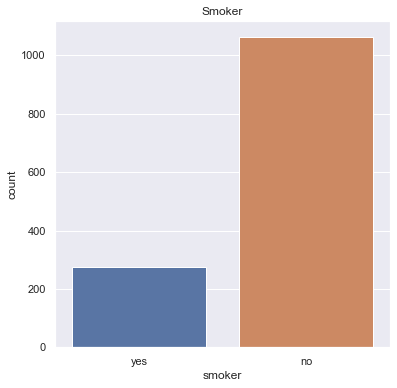

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('Smoker')
plt.show()

In [28]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

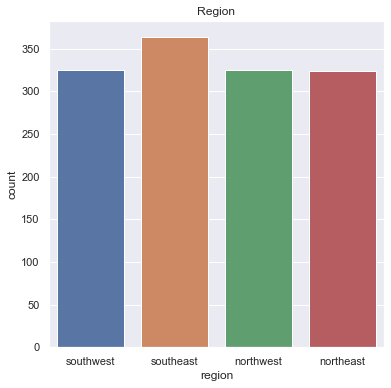

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('Region')
plt.show()

In [31]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

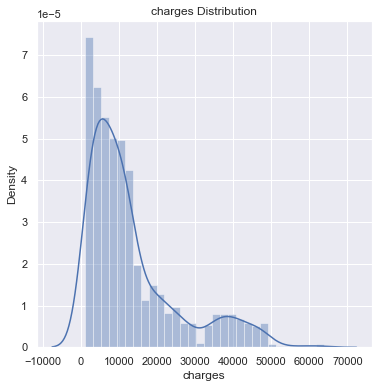

In [33]:
# charges distribution
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('charges Distribution')
plt.show()

## Data Pre-processing

##### Encoding the categorical features

In [37]:
# encoding the sex column
df.replace({'sex':{'male':0,'female':1}},inplace=True)

In [38]:
# encoding smoker column

df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

In [39]:
# encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace =True)

In [68]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
5,31,1,25.740,0,1,0,3756.62160
6,46,1,33.440,1,1,0,8240.58960
7,37,1,27.740,3,1,3,7281.50560
8,37,0,29.830,2,1,2,6406.41070
9,60,1,25.840,0,1,3,28923.13692


## Spliting the features and target


In [64]:
x=df.drop('charges',axis=1)
y=df['charges']

### spliting the data into training data and testing data

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=2)


In [45]:
print(x.shape, x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model Training

In [47]:
model=LinearRegression()

In [49]:
model.fit(x_train,y_train)

LinearRegression()

## Model evaluation

In [51]:
# Prediction of training data 
training_data_prediction=model.predict(x_train)

In [53]:
# R squared value 
r2_train=metrics.r2_score(y_train, training_data_prediction)
print('R squared value :', r2_train)

R squared value : 0.751505643411174


In [54]:
# Prediction of testing data 
testing_data_prediction=model.predict(x_test)

In [65]:
# R squared value 
r2_test=metrics.r2_score(y_test, testing_data_prediction)
print('R squared value :', r2_test)

ValueError: Found input variables with inconsistent numbers of samples: [268, 1070]

## Building a predicting system

In [71]:
input_data=(37,0,29.83,2,1,2)

input_data_as_numpy_array=np.asarray(input_data)

# reshape the array 
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshape)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[8179.73142879]
The insurance cost is USD  8179.731428794679
